In [1]:
# BAGIAN 1: Setup dan Import Library
# Untuk menjalankan di localhost/VS Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Library berhasil diimport!")
print("📍 Menjalankan di localhost/VS Code")

✅ Library berhasil diimport!
📍 Menjalankan di localhost/VS Code


In [2]:
# BAGIAN 2: Load dan Tampilkan Data

df = pd.read_csv('tourism_with_id.csv')

print("Dataset Indonesia Tourism Destination")
print("="*60)

print("\nData 10 baris pertama:")
print(df.head(10))

print("\nData 5 baris terakhir:")
print(df.tail())

print(f"\nUkuran dataset: {df.shape[0]} baris x {df.shape[1]} kolom")
print(f"\nNama kolom: {df.columns.tolist()}")

Dataset Indonesia Tourism Destination

Data 10 baris pertama:
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   
5         6            Taman Impian Jaya Ancol   
6         7             Kebun Binatang Ragunan   
7         8                      Ocean Ecopark   
8         9                   Pelabuhan Marina   
9        10                       Pulau Tidung   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan

In [3]:
# BAGIAN 3: Identifikasi Tipe Data dan Atribut

print("Identifikasi Tipe Data")
print("="*60)

df.info()

print("\nTipe data per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nKolom numerik: {numerical_cols}")
print(f"Kolom kategorikal: {categorical_cols}")

Identifikasi Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB

Tipe data per kolom:
Place_Id: int64
Place_Name: object
Description: object
Category: object
City: object
Price: int64
Rating: float64
Time_Minutes: float64
Coordi

In [4]:
# BAGIAN 4: Analisis Kualitas Data

print("Analisis Kualitas Data")
print("="*60)

print("\nMissing values:")
missing = df.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("Tidak ada missing values")

print("\nData duplikat:")
duplicates = df.duplicated().sum()
print(f"Jumlah: {duplicates}")

print("\nUnique values per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Analisis Kualitas Data

Missing values:
Time_Minutes    232
Unnamed: 11     437
dtype: int64

Data duplikat:
Jumlah: 0

Unique values per kolom:
Place_Id: 437
Place_Name: 437
Description: 437
Category: 6
City: 5
Price: 50
Rating: 14
Time_Minutes: 15
Coordinate: 437
Lat: 437
Long: 437
Unnamed: 11: 0
Unnamed: 12: 437


In [5]:
# BAGIAN 5: Deskripsi Statistik

print("Deskripsi Statistik")
print("="*60)

print("\nStatistik numerik:")
print(df.describe())

print("\nStatistik kategorikal:")
print(df.describe(include='object'))

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols[:3]:
    print(f"\nTop 10 {col}:")
    print(df[col].value_counts().head(10))

Deskripsi Statistik

Statistik numerik:
         Place_Id          Price      Rating  Time_Minutes         Lat  \
count  437.000000     437.000000  437.000000    205.000000  437.000000   
mean   219.000000   24652.173913    4.442792     82.609756   -7.095438   
std    126.295289   66446.374709    0.208587     52.872339    0.727241   
min      1.000000       0.000000    3.400000     10.000000   -8.197894   
25%    110.000000       0.000000    4.300000     45.000000   -7.749590   
50%    219.000000    5000.000000    4.500000     60.000000   -7.020524   
75%    328.000000   20000.000000    4.600000    120.000000   -6.829411   
max    437.000000  900000.000000    5.000000    360.000000    1.078880   

             Long  Unnamed: 11  Unnamed: 12  
count  437.000000          0.0   437.000000  
mean   109.160142          NaN   219.000000  
std      1.962848          NaN   126.295289  
min    103.931398          NaN     1.000000  
25%    107.578369          NaN   110.000000  
50%    110.237468

Visualisasi Data


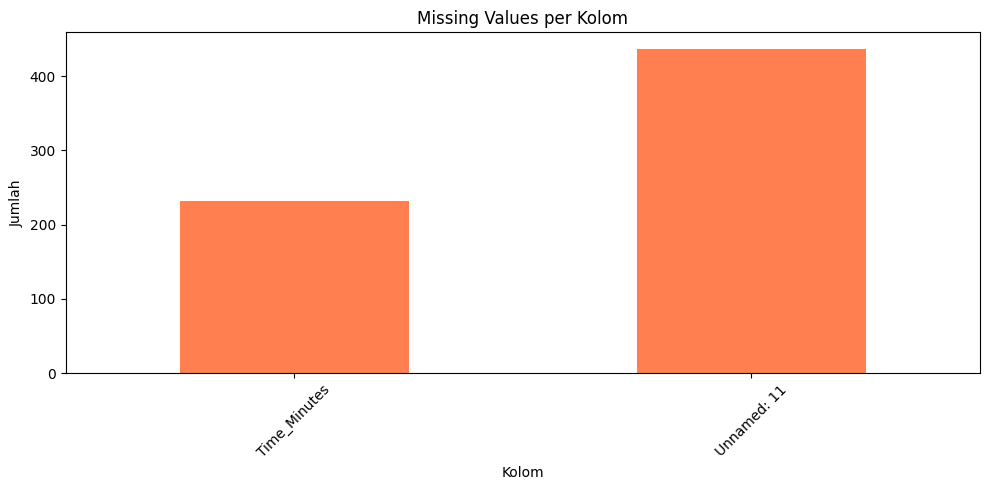

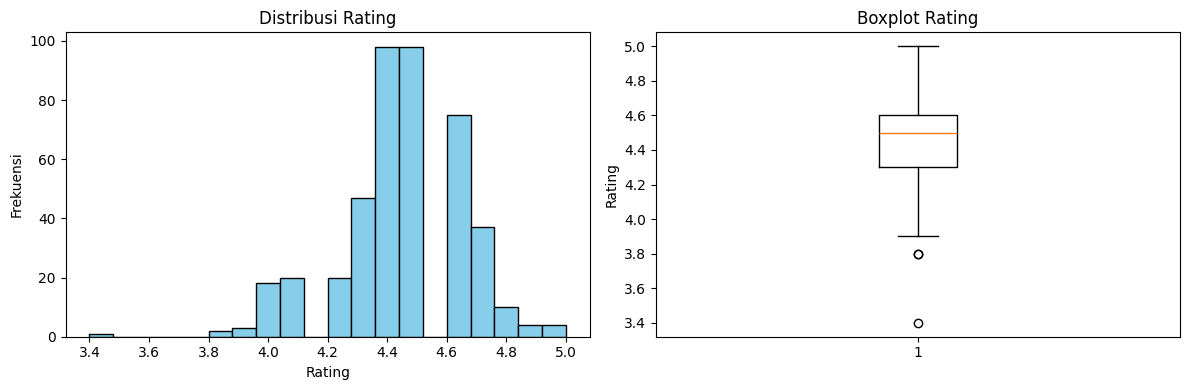

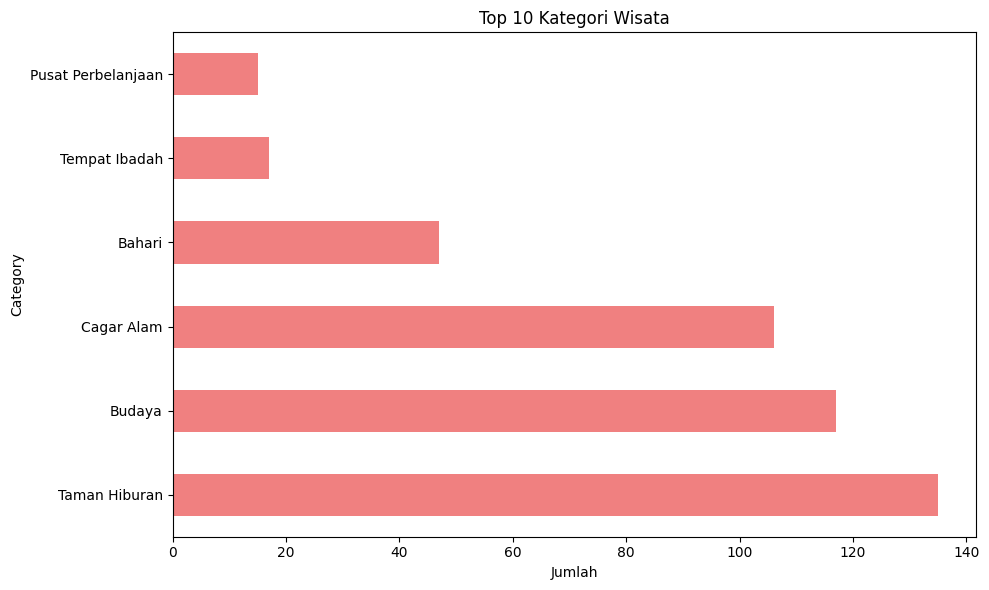

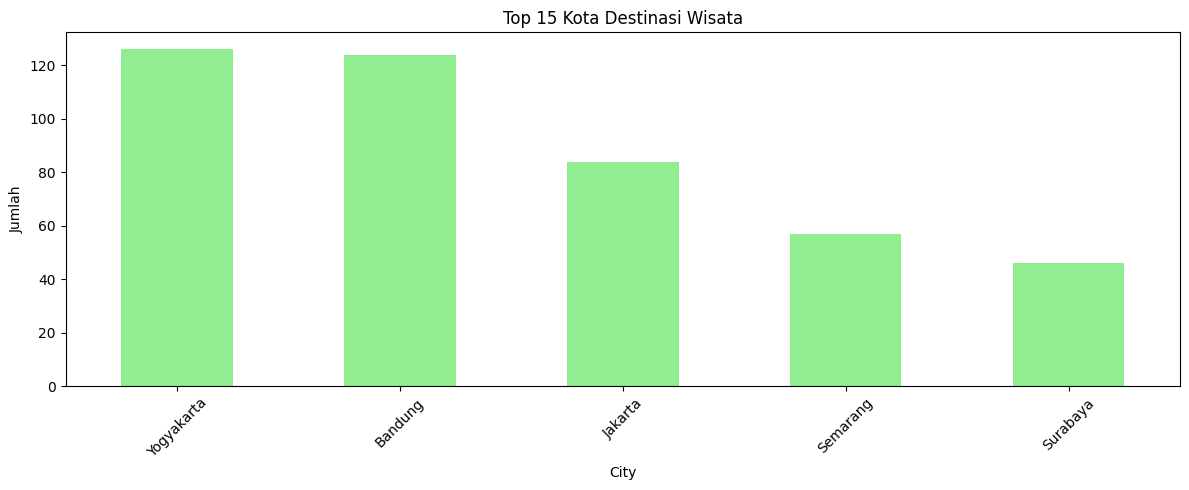

In [6]:
# BAGIAN 6: Visualisasi Data

print("Visualisasi Data")
print("="*60)

missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

if len(missing_data) > 0:
    plt.figure(figsize=(10, 5))
    missing_data.plot(kind='bar', color='coral')
    plt.title('Missing Values per Kolom')
    plt.ylabel('Jumlah')
    plt.xlabel('Kolom')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if 'Rating' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].hist(df['Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title('Distribusi Rating')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Frekuensi')

    axes[1].boxplot(df['Rating'].dropna())
    axes[1].set_title('Boxplot Rating')
    axes[1].set_ylabel('Rating')

    plt.tight_layout()
    plt.show()

if 'Category' in df.columns:
    plt.figure(figsize=(10, 6))
    df['Category'].value_counts().head(10).plot(kind='barh', color='lightcoral')
    plt.title('Top 10 Kategori Wisata')
    plt.xlabel('Jumlah')
    plt.tight_layout()
    plt.show()

if 'City' in df.columns:
    plt.figure(figsize=(12, 5))
    df['City'].value_counts().head(15).plot(kind='bar', color='lightgreen')
    plt.title('Top 15 Kota Destinasi Wisata')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
# BAGIAN 7: Data Cleaning

print("Data Cleaning")
print("="*60)

df_clean = df.copy()
print(f"Shape awal: {df_clean.shape}")

print("\nHandling missing values:")
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['int64', 'float64']:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"{col}: diisi dengan median")
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            print(f"{col}: diisi dengan modus")

print("\nRemove duplicates:")
dup_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
print(f"Duplikat dihapus: {dup_before}")
print(f"Shape setelah: {df_clean.shape}")

Data Cleaning
Shape awal: (437, 13)

Handling missing values:
Time_Minutes: diisi dengan median
Unnamed: 11: diisi dengan median

Remove duplicates:
Duplikat dihapus: 0
Shape setelah: (437, 13)


In [8]:
# BAGIAN 8: Feature Selection

print("Feature Selection")
print("="*60)

cols_to_drop = [col for col in df_clean.columns if 'unnamed' in col.lower()]

if cols_to_drop:
    df_clean = df_clean.drop(cols_to_drop, axis=1)
    print(f"Kolom dihapus: {cols_to_drop}")
else:
    print("Semua kolom relevan")

print(f"\nTotal kolom: {len(df_clean.columns)}")

Feature Selection
Kolom dihapus: ['Unnamed: 11', 'Unnamed: 12']

Total kolom: 11


Handling Outliers
Q1: 4.30
Q3: 4.60
IQR: 0.30
Batas bawah: 3.85
Batas atas: 5.05
Outliers: 3


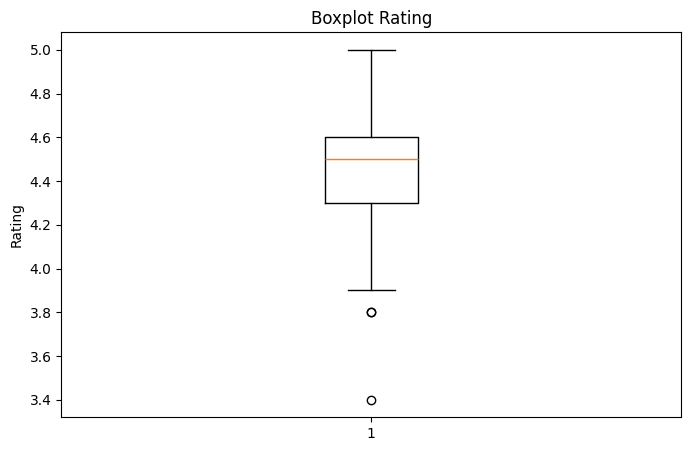

In [9]:
# BAGIAN 9: Handling Outliers

print("Handling Outliers")
print("="*60)

if 'Rating' in df_clean.columns:
    Q1 = df_clean['Rating'].quantile(0.25)
    Q3 = df_clean['Rating'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df_clean['Rating'] < lower) | (df_clean['Rating'] > upper)).sum()

    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Batas bawah: {lower:.2f}")
    print(f"Batas atas: {upper:.2f}")
    print(f"Outliers: {outliers}")

    plt.figure(figsize=(8, 5))
    plt.boxplot(df_clean['Rating'].dropna())
    plt.title('Boxplot Rating')
    plt.ylabel('Rating')
    plt.show()

FEATURE SELECTION - VARIANCE ANALYSIS

Variance per Feature:
Price: 4,415,120,712.01
Time_Minutes: 2,795.48
Long: 3.85
Lat: 0.53
Rating: 0.04


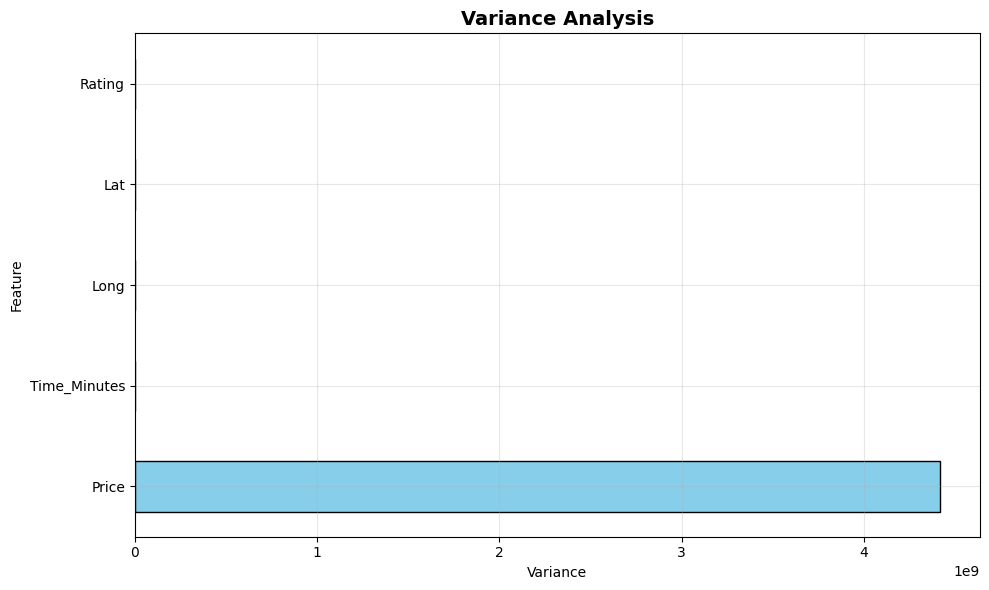

In [10]:
# BAGIAN 10 (TAMBAHAN UNTUK PREPROCESSING: Variance Analysis)

print("="*60)
print("FEATURE SELECTION - VARIANCE ANALYSIS")
print("="*60)

numerical_features = ['Price', 'Rating', 'Time_Minutes', 'Lat', 'Long']
variances = df[numerical_features].var()
variances_sorted = variances.sort_values(ascending=False)

print("\nVariance per Feature:")
for feature, var in variances_sorted.items():
    print(f"{feature}: {var:,.2f}")

plt.figure(figsize=(10, 6))
variances_sorted.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Variance Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# BAGIAN 11: Data Scaling

print("Data Scaling")
print("="*60)

from sklearn.preprocessing import MinMaxScaler

numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_to_scale = [col for col in numerical_cols if 'id' not in col.lower()]

if cols_to_scale:
    scaler = MinMaxScaler()

    print(f"Kolom yang di-scale: {cols_to_scale}")
    print("\nSebelum scaling:")
    print(df_clean[cols_to_scale].describe())

    df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

    print("\nSetelah scaling:")
    print(df_clean[cols_to_scale].describe())

Data Scaling
Kolom yang di-scale: ['Price', 'Rating', 'Time_Minutes', 'Lat', 'Long']

Sebelum scaling:
               Price      Rating  Time_Minutes         Lat        Long
count     437.000000  437.000000    437.000000  437.000000  437.000000
mean    24652.173913    4.442792     70.606407   -7.095438  109.160142
std     66446.374709    0.208587     37.889092    0.727241    1.962848
min         0.000000    3.400000     10.000000   -8.197894  103.931398
25%         0.000000    4.300000     60.000000   -7.749590  107.578369
50%      5000.000000    4.500000     60.000000   -7.020524  110.237468
75%     20000.000000    4.600000     60.000000   -6.829411  110.431869
max    900000.000000    5.000000    360.000000    1.078880  112.821662

Setelah scaling:
            Price      Rating  Time_Minutes         Lat        Long
count  437.000000  437.000000    437.000000  437.000000  437.000000
mean     0.027391    0.651745      0.173161    0.118840    0.588143
std      0.073829    0.130367      0

In [12]:
# BAGIAN 12: Encoding Categorical

print("Encoding Categorical")
print("="*60)

from sklearn.preprocessing import LabelEncoder

categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

if categorical_cols:
    for col in categorical_cols:
        unique = df_clean[col].nunique()

        if unique < 50:
            le = LabelEncoder()
            df_clean[col + '_encoded'] = le.fit_transform(df_clean[col].astype(str))
            print(f"{col} -> {col}_encoded")

Encoding Categorical
Category -> Category_encoded
City -> City_encoded


FEATURE SELECTION - PCA ANALYSIS

Explained Variance:
PC1: 36.16%
PC2: 16.41%
PC3: 14.31%
PC4: 14.00%
PC5: 11.19%
PC6: 5.03%
PC7: 2.90%


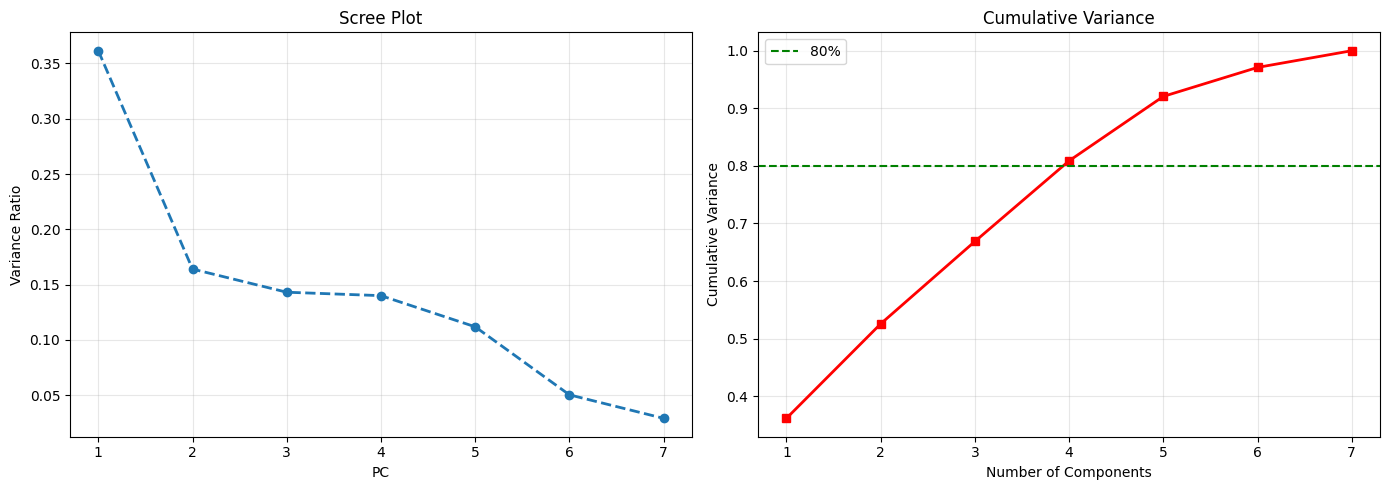

In [13]:
# BAGIAN 13 (TAMBAHAN UNTUK PREPROCESSING: PCA Analysis)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("="*60)
print("FEATURE SELECTION - PCA ANALYSIS")
print("="*60)

features_pca = ['Price', 'Rating', 'Time_Minutes', 'Lat', 'Long',
                'Category_encoded', 'City_encoded']

scaler_pca = StandardScaler()
features_scaled = scaler_pca.fit_transform(df_clean[features_pca])

pca = PCA()
pca.fit(features_scaled)

explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var*100:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, len(explained_variance)+1), explained_variance,
            marker='o', linestyle='--', linewidth=2)
axes[0].set_title('Scree Plot')
axes[0].set_xlabel('PC')
axes[0].set_ylabel('Variance Ratio')
axes[0].grid(alpha=0.3)

cumulative = np.cumsum(explained_variance)
axes[1].plot(range(1, len(cumulative)+1), cumulative,
            marker='s', linewidth=2, color='red')
axes[1].axhline(0.8, linestyle='--', color='green', label='80%')
axes[1].set_title('Cumulative Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

COMPARISON: BEFORE vs AFTER NORMALIZATION


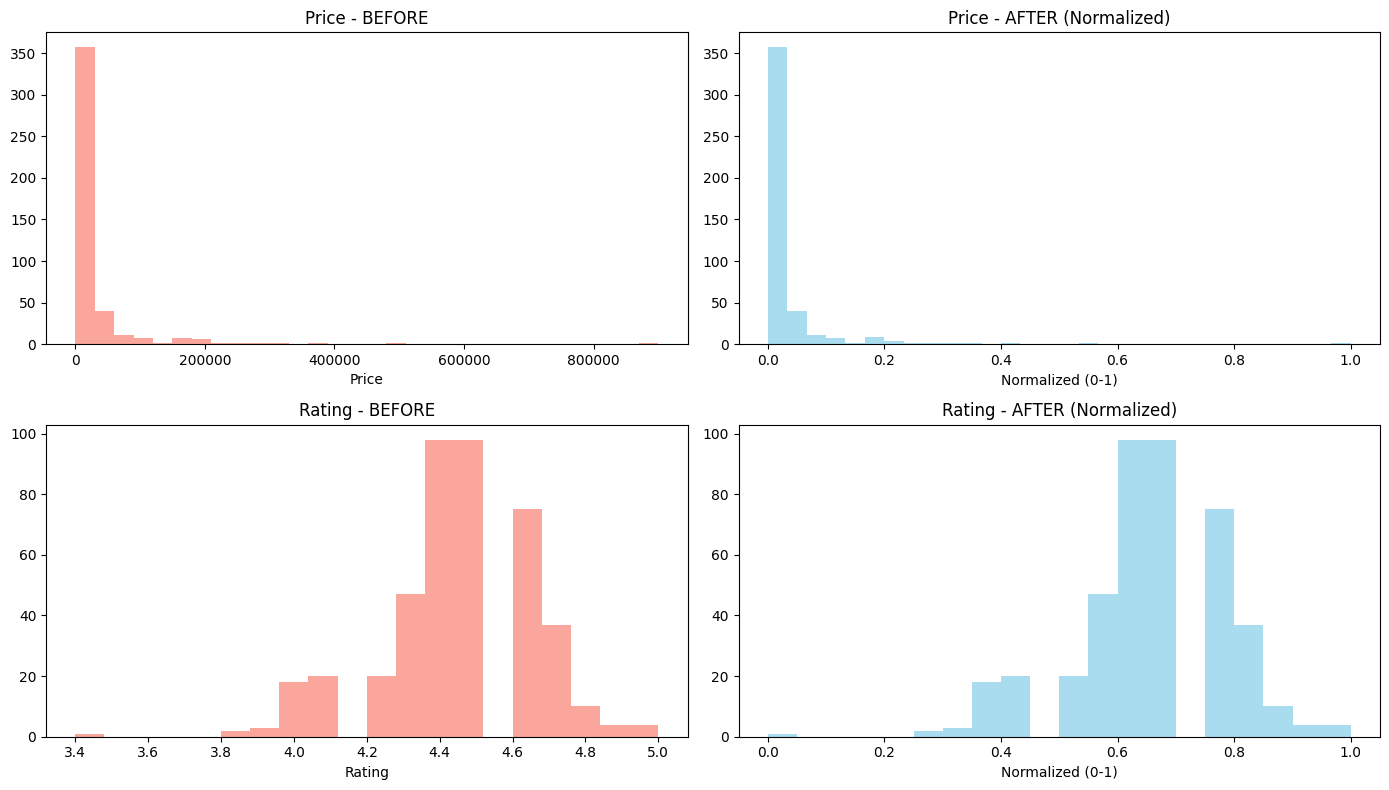

In [14]:
# BAGIAN 14 (TAMBAHAN: Visualisasi Before/After Normalization)

print("="*60)
print("COMPARISON: BEFORE vs AFTER NORMALIZATION")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Price
axes[0,0].hist(df['Price'], bins=30, color='salmon', alpha=0.7)
axes[0,0].set_title('Price - BEFORE')
axes[0,0].set_xlabel('Price')

axes[0,1].hist(df_clean['Price'], bins=30, color='skyblue', alpha=0.7)
axes[0,1].set_title('Price - AFTER (Normalized)')
axes[0,1].set_xlabel('Normalized (0-1)')

# Rating
axes[1,0].hist(df['Rating'], bins=20, color='salmon', alpha=0.7)
axes[1,0].set_title('Rating - BEFORE')
axes[1,0].set_xlabel('Rating')

axes[1,1].hist(df_clean['Rating'], bins=20, color='skyblue', alpha=0.7)
axes[1,1].set_title('Rating - AFTER (Normalized)')
axes[1,1].set_xlabel('Normalized (0-1)')

plt.tight_layout()
plt.show()

K-MEANS CLUSTERING


  File "c:\Users\Lenovo\anaconda3\envs\deploy-model-finalproject\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\Lenovo\anaconda3\envs\deploy-model-finalproject\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "c:\Users\Lenovo\anaconda3\envs\deploy-model-finalproject\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Lenovo\anaconda3\envs\deploy-model-finalproject\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Lenovo\anaconda3\envs\deploy-model-finalproject\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


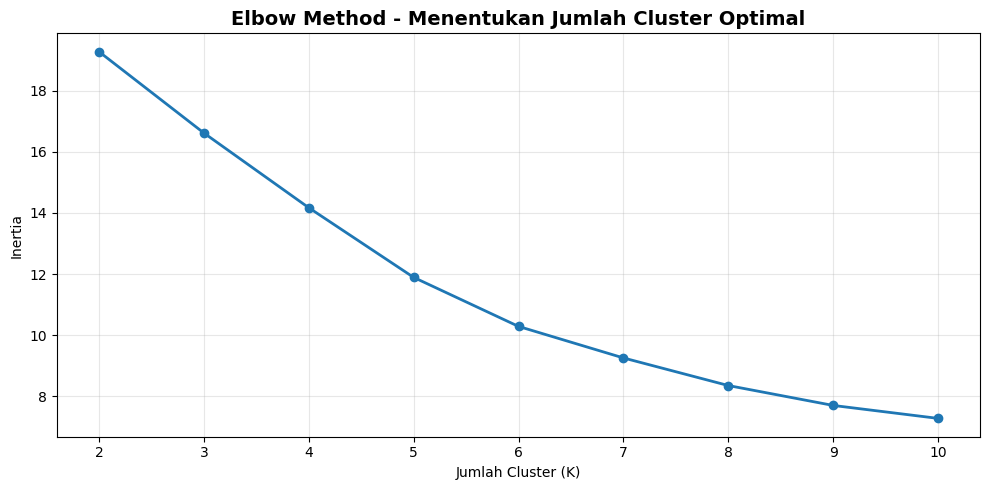


Menggunakan K = 4 cluster

Distribusi Cluster:
Cluster
0     52
1     46
2    182
3    157
Name: count, dtype: int64


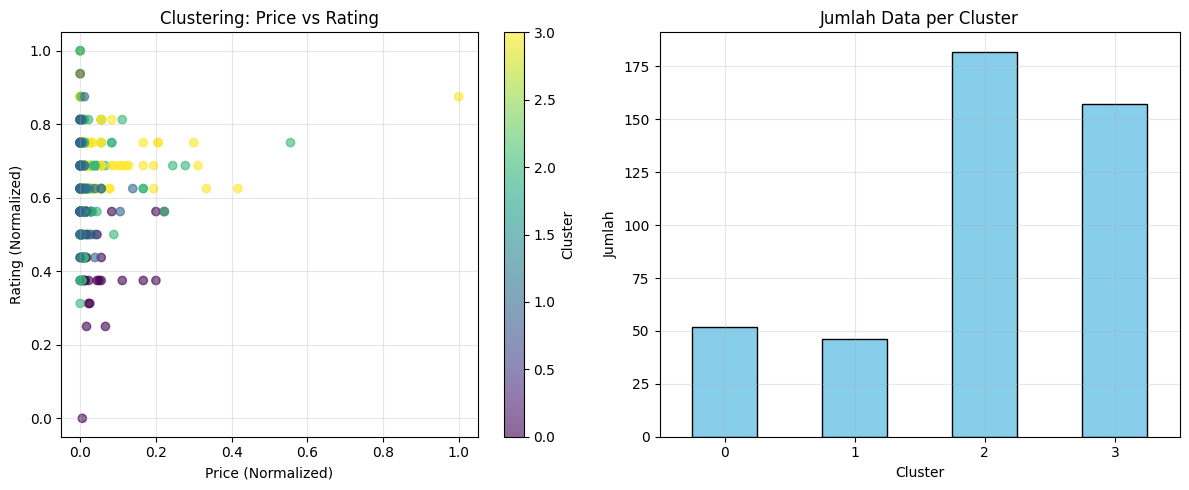


✅ Model K-Means berhasil disimpan ke 'kmeans_model.pkl'

Informasi Model:
- Jumlah cluster: 4
- Inertia: 14.17
- Centroid shape: (4, 5)


In [15]:
# BAGIAN 15: K-Means Clustering dan Simpan Model

print("="*60)
print("K-MEANS CLUSTERING")
print("="*60)

from sklearn.cluster import KMeans
import pickle

# Siapkan fitur untuk clustering
features_clustering = ['Price', 'Rating', 'Time_Minutes', 'Lat', 'Long']
X = df_clean[features_clustering].values

# Elbow Method untuk menentukan jumlah cluster optimal
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o', linewidth=2)
plt.title('Elbow Method - Menentukan Jumlah Cluster Optimal', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Training K-Means dengan K optimal (misalnya K=4)
optimal_k = 4
print(f"\nMenggunakan K = {optimal_k} cluster")

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_model.fit(X)

# Tambahkan label cluster ke dataframe
df_clean['Cluster'] = kmeans_model.labels_

print(f"\nDistribusi Cluster:")
print(df_clean['Cluster'].value_counts().sort_index())

# Visualisasi Cluster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df_clean['Price'], df_clean['Rating'], 
                      c=df_clean['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Price (Normalized)')
plt.ylabel('Rating (Normalized)')
plt.title('Clustering: Price vs Rating')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
df_clean['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Simpan model K-Means ke file .pkl
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

print("\n✅ Model K-Means berhasil disimpan ke 'kmeans_model.pkl'")

# Tampilkan informasi model
print(f"\nInformasi Model:")
print(f"- Jumlah cluster: {kmeans_model.n_clusters}")
print(f"- Inertia: {kmeans_model.inertia_:.2f}")
print(f"- Centroid shape: {kmeans_model.cluster_centers_.shape}")

In [16]:
# BAGIAN 16: Hasil Akhir dan Export

print("Hasil Akhir")
print("="*60)

print("\nData setelah praproses:")
print(df_clean.head(10))

print(f"\nShape original: {df.shape}")
print(f"Shape clean: {df_clean.shape}")

print("\nStatistik akhir:")
print(df_clean.describe())

df_clean.to_csv('tourism_cleaned.csv', index=False)

print("\n✅ File berhasil disimpan:")
print("   - tourism_cleaned.csv")
print("   - kmeans_model.pkl")

Hasil Akhir

Data setelah praproses:
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   
5         6            Taman Impian Jaya Ancol   
6         7             Kebun Binatang Ragunan   
7         8                      Ocean Ecopark   
8         9                   Pelabuhan Marina   
9        10                       Pulau Tidung   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta   
4  Atlantis 